In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path_to_file = 'drivers.csv'

In [4]:
drivers = pd.read_csv(path_to_file)

In [5]:
path_to_file2 = 'passengers.csv'

In [6]:
passengers = pd.read_csv(path_to_file2)

In [7]:
participants = passengers.merge(drivers, on= 'journey_id')

In [8]:
participants.dtypes

journey_id           object
user_id              object
start_type           object
start_lat            object
start_lon            object
source               object
driver_score        float64
driver_id            object
taxi_id              object
icon                 object
start_at             object
end_at               object
end_lat              object
end_lon              object
end_state            object
driver_start_lat     object
driver_start_lon     object
arrived_at           object
rider_score         float64
dtype: object

In [9]:
path_to_file3 = 'taxi_2.csv'

In [10]:
taxi2 = pd.read_csv(path_to_file3)

In [11]:
df_new = pd.concat([participants, taxi2])

In [12]:
df_new.shape

(23111, 19)

In [13]:
df_new.columns

Index(['journey_id', 'user_id', 'start_type', 'start_lat', 'start_lon',
       'source', 'driver_score', 'driver_id', 'taxi_id', 'icon', 'start_at',
       'end_at', 'end_lat', 'end_lon', 'end_state', 'driver_start_lat',
       'driver_start_lon', 'arrived_at', 'rider_score'],
      dtype='object')

In [14]:
df_new.isna().sum()

journey_id              0
user_id                 0
start_type              0
start_lat               0
start_lon               0
source                123
driver_score        15461
driver_id            3385
taxi_id              3385
icon                    0
start_at                0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
rider_score          7721
dtype: int64

In [15]:
df_new.source.nunique()

5

In [16]:
# доля вхождений уникальный значений в колонке source 
source_counts = df_new['source'].value_counts(normalize=True)

In [17]:
source_counts

iPhone     0.423743
web        0.331956
Android    0.213546
iPad       0.024839
Wap        0.005916
Name: source, dtype: float64

In [18]:
max_share = source_counts.max() * 100

In [19]:
max_share_rounded = round(max_share)

In [20]:
max_share_rounded

42

In [21]:
max_source = source_counts.idxmax()

In [22]:
max_source

'iPhone'

In [23]:
source_counts_absolut = df_new['source'].value_counts().reset_index()\
            .rename(columns={'index': 'sources', 'source': 'count'})

In [24]:
source_counts_absolut

,sources,count
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


In [25]:
df1 = pd.DataFrame(source_counts_absolut)

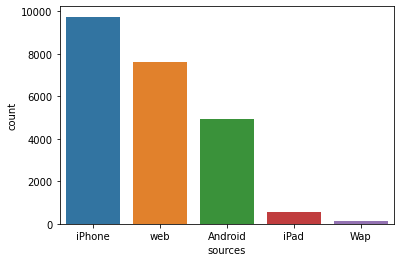

In [26]:
ax = sns.barplot(data=df1, x='sources', y='count')

In [27]:
# Настройка стиля графика
sns.set(style="whitegrid")

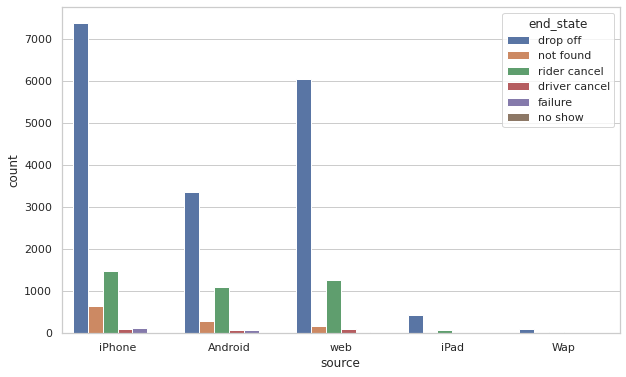

In [28]:
# Построение графика
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
ax = sns.countplot(data=df_new, x='source', hue='end_state')

In [29]:
df_new.driver_score

0        5.0
1        NaN
2        NaN
3        NaN
4        4.0
        ... 
11551    5.0
11552    NaN
11553    0.0
11554    NaN
11555    NaN
Name: driver_score, Length: 23111, dtype: float64

In [30]:
driver_score_unique = df_new['driver_score'].value_counts(normalize=True)

In [31]:
driver_score_unique

5.0    0.588105
4.0    0.218824
0.0    0.143007
3.0    0.029673
1.0    0.012288
2.0    0.008105
Name: driver_score, dtype: float64

In [32]:
driver_score_unique = driver_score_unique * 100

In [33]:
driver_score_unique_rounded = driver_score_unique.round(2)

In [34]:
driver_score_unique_rounded

5.0    58.81
4.0    21.88
0.0    14.30
3.0     2.97
1.0     1.23
2.0     0.81
Name: driver_score, dtype: float64

In [35]:
driver_score_counts = driver_score_unique_rounded.reset_index()\
            .rename(columns={'driver_score':'percentage', 'index':'driver_score'})\
            .sort_values('driver_score')
            

In [36]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [37]:
# или так: 
# driver_score_counts = taxi.driver_score.value_counts(normalize=True)\
#    .mul(100)\
#    .round(2)\
#    .reset_index()\
 #   .rename(columns={'driver_score':'percentage', 'index':'driver_score'})\
 #   .sort_values('driver_score')

In [38]:
driver_score_counts.sort_values('percentage', ascending=False, inplace = True) 
# inplace - перезапись в ту же переменную, т.е. в dtiver_score_counts

In [39]:
driver_score_counts

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [40]:
plt.figure(figsize=(8, 8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f1fd39115f8>,
 [Text(-1.058136102172393, -0.30057942258147885, '5.0'),
  Text(1.0406937732795805, -0.3563095146878759, '4.0'),
  Text(0.7610252061025489, 0.7942547674874688, '0.0'),
  Text(0.24164403242813945, 1.0731300767343483, '3.0'),
  Text(0.09835791094023233, 1.0955937757013197, '1.0'),
  Text(0.02798909483182033, 1.0996438562418722, '2.0')])

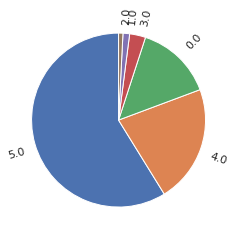

In [41]:
plt.pie(driver_score_counts.percentage, labels = driver_score_counts.driver_score, startangle=90, rotatelabels=True)

In [42]:
# сделаем анализ оценок пассажирам
df_new.rider_score 

0        5.0
1        NaN
2        NaN
3        NaN
4        5.0
        ... 
11551    5.0
11552    5.0
11553    0.0
11554    5.0
11555    NaN
Name: rider_score, Length: 23111, dtype: float64

In [43]:
# насколько часто встречается та или иная оценка
rider_score_unique = df_new['rider_score'].value_counts(normalize=True)

In [44]:
rider_score_unique

5.0    0.870955
4.0    0.088304
0.0    0.022872
3.0    0.013840
1.0    0.002079
2.0    0.001949
Name: rider_score, dtype: float64

In [45]:
rider_score_counts = df_new.rider_score.value_counts(normalize=True)\
            .mul(100)\
            .round(2)\
            .reset_index()\
            .rename(columns={'rider_score':'percentage', 'index':'rider_score'})\
            .sort_values('rider_score')

# переименовала колонки именно в таком порядке, чтобы не было путаницы с индексом
# отсортировала по возрастанию оценки 

In [46]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


In [47]:
df_new['start_at'] = pd.to_datetime(df_new['start_at']) 
df_new['end_at'] = pd.to_datetime(df_new['end_at'])
df_new['arrived_at'] = pd.to_datetime(df_new['arrived_at'])

In [48]:
df_new.query('start_type == "asap" | start_type == "reserved"') # Отфильтруйте данные и оставьте наблюдения со статусами заказа "asap" и "reserved"
# df_new.query('start_type.isin(["asap", "reserved"])') - isin - содержится ли значение в списке

,journey_id,user_id,start_type,start_lat,start_lon,source,driver_score,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11551,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,reserved,"-12,08974075","-77,04699707",iPhone,5.0,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,2010-07-31 13:15:00,2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,5.0
11552,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,asap,"-12,09253011","-77,02875271",Android,NaN,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,2010-10-02 05:26:00,2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,5.0
11553,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,asap,"-12,1275637","-77,02642288",Android,0.0,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,2010-09-21 09:56:00,2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,0.0
11554,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,reserved,"-12,019468","-77,1077669",Android,NaN,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,2010-04-29 04:30:00,2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,5.0


In [49]:
df_new['wait_time'] = df_new['arrived_at'] - df_new['start_at'] # разница м\у временем подачи и временем заказа

In [50]:
df_new.wait_time.median() # медианное время подачи машины

Timedelta('0 days 00:05:00')

In [143]:
late_drivers = df_new[(df_new['start_type'] == 'reserved') & (df_new['wait_time'] > pd.to_timedelta('0 days 00:00:00'))]   

In [147]:
late_drivers_counts = late_drivers['driver_id'].value_counts()\
            .reset_index()\
            .rename(columns={'driver_id': 'total_orders', 'index': 'driver_id'})

In [148]:
late_drivers_counts

,driver_id,total_orders
0,406921adcca37705ef527b4246c0cfea,67
1,d665fb9f75ef5d9cd0fd89479380ba78,59
2,ec84a73745199ff840ecafcb924383ad,57
3,56f59b58bcbbd1cdabc3652e713134c2,51
4,c814db2127582cf95dea1f74f43127c2,45
...,...,...
100,5ced91860ba5d7fe2859267c89529e71,1
101,fdba41f4b66d90ed7863fce32b97a19f,1
102,36c09cf37ce9cd241ffd160d17d6bcf9,1
103,86981d5cc39076d9d0281221fe19f3fa,1


In [55]:
# Проверка гипотез что может влиять на число опозданий водителя:
# 1. Число взятых заказов
# 2. Оценки, поставленные этим водителем его пассажирам
# НЕТ 3. Непунктуальность водителя (доля опозданий от всех его поездок у этого водителя больше, чем соответствующие доли у всех остальных водителей)
# НЕТ 4. Цвет его машины

In [136]:
total_drivers = df_new.driver_id.value_counts()\
            .reset_index()\
            .rename(columns={'driver_id': 'total_orders', 'index': 'driver_id'})

In [150]:
total_drivers['theory3'] = late_drivers_counts.total_orders / total_drivers.total_orders * 100
# доля опозданий от всех поездок. самый опаздывающий водитель 406921adcca37705ef527b4246c0cfea

In [151]:
total_drivers

,driver_id,total_orders,theory3
0,c814db2127582cf95dea1f74f43127c2,1523,4.399212
1,d665fb9f75ef5d9cd0fd89479380ba78,1225,4.816327
2,ff5c924e0b630fd7c019a4234059fdf4,1111,5.130513
3,406921adcca37705ef527b4246c0cfea,1075,4.744186
4,ec84a73745199ff840ecafcb924383ad,974,4.620123
...,...,...,...
163,bf0f0845b5094fda2fcdac195ece97ad,1,NaN
164,ab90a1bf4289d96e78d4a47d7cc2cd22,1,NaN
165,5c631eab42d9b2426420a89b862a4a0e,1,NaN
166,a8c74399632ec313e9e79e1a30538570,1,NaN


In [152]:
theory1_correlation = total_drivers['total_orders'].corr(late_drivers_counts['total_orders'])
print(f'Коэффициент корреляции: {correlation}')

Коэффициент корреляции: 0.9960963937848496


In [62]:
no_late_drivers = df_new[(df_new['start_type'].isin(['reserved', 'asap'])) & (df_new['wait_time'] < pd.to_timedelta('0 days 00:00:00'))]\
            .driver_id.value_counts()\
            .reset_index()\
            .rename(columns={'driver_id': 'total_orders', 'index': 'driver_id'})

In [63]:
no_late_drivers

,driver_id,total_orders
0,d665fb9f75ef5d9cd0fd89479380ba78,482
1,c814db2127582cf95dea1f74f43127c2,307
2,ff5c924e0b630fd7c019a4234059fdf4,303
3,406921adcca37705ef527b4246bbbff5,299
4,406921adcca37705ef527b4246c0cfea,267
...,...,...
135,acf45a789a8ff88fb94179627131d87c,1
136,587ea1ea1ab415acb010ec8308275095,1
137,59cbac79f5a653e8a8eb10f0ca294192,1
138,fc308d768d77788c726b74fd5e4868bf,1


In [84]:
df_new['month'] = df_new['start_at'].dt.month

In [86]:
df_new['weekday'] = df_new['start_at'].dt.day_name()

In [87]:
df_new.weekday

0         Tuesday
1         Tuesday
2          Monday
3         Tuesday
4        Saturday
           ...   
11551    Saturday
11552    Saturday
11553     Tuesday
11554    Thursday
11555     Tuesday
Name: weekday, Length: 23111, dtype: object

In [96]:
# Постройте график количества заказов по месяцам и определите месяц с наименьшим количеством заказов летом.

In [100]:
summer = df_new.groupby('month').size().reset_index(name='count')

In [103]:
summer_df = pd.DataFrame(summer)

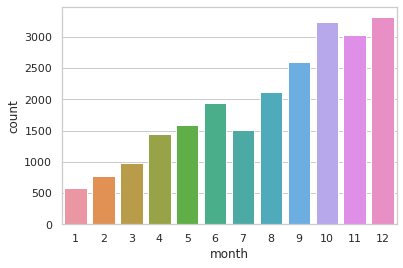

In [108]:
ax = sns.barplot(data=summer_df, x='month', y='count')

In [109]:
week = df_new.groupby('weekday').size().reset_index(name='count')

In [115]:
week_df = pd.DataFrame(week)

In [118]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #задаем в нужном порядке

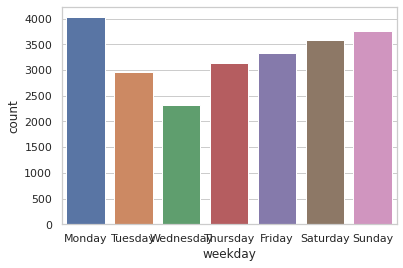

In [119]:
ax = sns.barplot(data=week_df, x='weekday', y='count', order=order)

In [120]:
# Посчитайте метрику MAU, постройте её график и выберите одно или несколько верных утверждений
# Число уникальных юзеров в течение года как увеличивалось, так и уменьшалось - NO
# MAU за апрель примерно в 2.5 раза больше, чем за январь - YES
# В течение всего года число уникальных пользователей увеличивалось - YES 
# Летом наблюдался спад числа уникальных пользователей в месяц - NO

In [121]:
mau = df_new.groupby('month')['user_id'].nunique().reset_index(name='MAU')

In [124]:
mau_df = pd.DataFrame(mau)

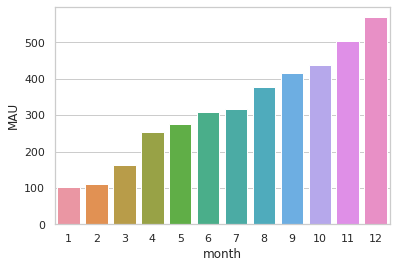

In [125]:
ax = sns.barplot(data=mau_df, x='month', y='MAU')